In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
from astropy.io import fits, ascii
from astropy.table import Table
import numba

In [62]:
FOLDER='/users/caganze/desktop/objLE24/'
#file='hlsp_glass_hst_wfc3_a370_00969-g102-id00969-pa999_g102_v001_1dstack.fits'
#image='hlsp_glass_hst_wfc3_a370_00969-g102-id00969-pa999_g102_v001_2dstack.fits'

In [63]:
#hdu=fits.open(FOLDER+file)

In [64]:
#sp=Table(hdu[1].data).to_pandas()

In [65]:
#imge=fits.open(FOLDER+image)

In [66]:
#plt.imshow(imge[1].data)

In [67]:
#sp.columns

In [68]:
import wisps

In [69]:
def create_wisp_spectra(fname):
    try:
        with fits.open(fname) as hdu:
            t=Table(hdu[1].data).to_pandas()
        sp=wisps.Spectrum(wave=t.wave/10000, flux=t.flux, noise=t.error, contam=t.contam)
        sp.normalize()
        return sp
    except:
        return 


In [70]:
def create_spectrum_id(fname):
    if fname is None:
        return 
    else:
        return 
        

In [71]:
import glob

In [72]:
files=glob.glob(FOLDER+'/*g141_*_1d.fits')

In [73]:
sps=[create_wisp_spectra(f) for f in files]

In [74]:
rf=pd.read_pickle(wisps.OUTPUT_FILES+'/random_forest_classifier.pkl') #the classifier 
min_max_scaler= pd.read_pickle(wisps.OUTPUT_FILES+'/min_max_scaler.pkl')#the min max scaler used to transform the data

In [75]:
features=['CH_4/H-Cont', 'CH_4/H_2O-1', 'CH_4/H_2O-2', 'CH_4/J-Cont',
       'H-cont/H_2O-1', 'H-cont/H_2O-2', 'H-cont/J-Cont', 'H_2O-1/J-Cont',
       'H_2O-2/H_2O-1', 'H_2O-2/J-Cont',  'spex_chi', 'snr2', 'snr1',
       'line_chi', 'x', 'f_test_cdf', 'spt']

In [76]:
spectra=[s for s in sps if s is not None]

In [77]:
def get_dictionary_of_values(sp):
    f_test={"f_test": sp.f_test, 'line_chi': sp.line_chi, 'spex_chi': sp.spex_chi, 'spt': sp.spt}
    return {**sp.snr, **sp.indices, **f_test}

In [78]:
df=pd.DataFrame.from_records([ get_dictionary_of_values(x) for x in spectra])

In [79]:
df['flux']=[x.flux for x in spectra]
df['wave']=[x.wave for x in spectra]

In [80]:
df

,snr1,snr2,cdf_snr,snr3,snr4,H_2O-1/J-Cont,H_2O-2/H_2O-1,H-cont/H_2O-1,CH_4/H_2O-1,H_2O-2/J-Cont,...,CH_4/J-Cont,H-cont/H_2O-2,CH_4/H_2O-2,CH_4/H-Cont,f_test,line_chi,spex_chi,spt,flux,wave
0,1.518497,1.761786,4.243661,2.152685,1.623593,"(0.8268749187182486, 847.155548424363)","(1.2118510501339628, 9.806115491047404)","(1.7829168200455299, 7.088621437420754)","(1.5602957913324054, 17.45788009425938)","(1.0020492385781445, 2.8117015277315174)",...,"(1.290169455634408, 4.841828344419754)","(1.471234290590778, 18.05081292220218)","(1.287530997443889, 4.086153040560307)","(0.8751366153428068, 3.836019183788695)",0.424794,172.076271,1.740046e+02,M0.0,"[-0.38774705308261265, -0.4609406732065722, -0...","[1.0209718306148525, 1.023322095168605, 1.0256..."
1,7.766938,9.511023,13.144139,10.572253,9.823436,"(0.8794658315000999, 0.19568853344632198)","(1.600149317230412, 0.34393437789667536)","(1.5835884157931321, 0.2566178018727434)","(1.5673440692393676, 0.30623710022714684)","(1.4072766498023614, 0.2533023400866721)",...,"(1.3784255551003508, 0.20960837963502268)","(0.9896504024599755, 0.12668329177650078)","(0.9794986332601606, 0.1263648561915951)","(0.9897420653044948, 0.12918237977512154)",0.713366,348.143537,1.944644e+03,M0.0,"[0.33475380416349326, 0.35288644700446764, 0.4...","[1.0249608045748735, 1.0273053705032693, 1.029..."
2,7.356291,0.748190,10.371661,0.000000,6.761375,"(0.876012822957783, 0.1709407293492389)","(1.156350736779826, 0.21947312800303387)","(0.0, 15234.622404950464)","(0.0, 13252.841013670097)","(1.0129780732558076, 0.187365988316953)",...,"(0.0, 12795.392386694133)","(0.0, 11313.890660746762)","(0.0, 12551.95761527431)","(nan, 85.50818682572529)",0.273969,786.803988,3.529204e+02,M0.0,"[0.17053861585281116, 0.2664047422997244, 0.11...","[1.0274935729506334, 1.0298302392526102, 1.032..."
3,7.232965,8.360597,13.399024,9.276746,8.130865,"(0.9379946117166394, 0.1870974635431027)","(1.2848422788764553, 0.2933226431678594)","(1.4158723368709425, 0.25802162933283096)","(1.4968485337522763, 0.3315730252273108)","(1.2051751344918429, 0.22720665267223483)",...,"(1.4040358592155875, 0.2213883802985514)","(1.101981433946171, 0.168905336546243)","(1.1650056651787737, 0.19262607094735326)","(1.0571917359867982, 0.15079569577390275)",0.684797,299.216687,1.356218e+03,M0.0,"[0.0026507094463065475, -0.012830537055787608,...","[1.019398874540737, 1.021685867813108, 1.02397..."
4,6.194283,5.591239,11.556967,5.422997,5.922306,"(1.0066039274763143, 0.24215546874059887)","(1.2903338289416015, 0.2703110351685448)","(0.8938498961199476, 0.2617336909518342)","(0.7564664176992807, 0.18118388043029984)","(1.2988550999681667, 0.2655837264640165)",...,"(0.761462067060034, 0.20660994877795236)","(0.6927276306885092, 0.17040652210141022)","(0.5862563630682872, 0.14949869904530338)","(0.8463013991308546, 0.23055661323563767)",0.468060,365.426479,4.630077e+02,M0.0,"[0.09028450957730538, 0.028409490411285664, -0...","[1.0185430749975444, 1.0207820738432793, 1.023..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,10.824989,12.159661,15.700380,12.773817,12.482931,"(0.7311515376203269, 0.108549428941143)","(1.6239552878970567, 0.2361281018363443)","(1.5445720377276109, 0.22726025051664395)","(1.4267900378531235, 0.22995616656553516)","(1.1873574057725935, 0.1555151355882857)",...,"(1.0431997300376756, 0.12746589654452792)","(0.951117342477918, 0.0982153025782201)","(0.8785894836432027, 0.10654474326446493)","(0.9237445732555347, 0.11492758989669775)",0.698792,532.457521,2.668198e+03,M0.0,"[-0.03198419626880813, 0.07716621104861875, 0....","[1.0248588856740892, 1.0272231553111113, 1.029..."
714,25.644201,23.946887,34.895354,20.986698,25.815250,"(0.9071525328815685, 0.05075840617940126)","(1.187506688183436, 0.07670211657449649)","(0.8674022356077471, 0.05524784386948877)","(0.7867503377879601, 0.050886651800219715)","(1.077249699999407, 0.0534539273322137)",...,"(0.7137025616697776, 0.04606782846915096)","

In [81]:
df['x']=df.spex_chi/df.line_chi
df['f_test_cdf']=df.f_test
df['spt']=df.spt.apply(wisps.make_spt_number)

In [82]:
pred_df=wisps.Annotator.reformat_table(df)

In [83]:
pred_df[features]

,CH_4/H-Cont,CH_4/H_2O-1,CH_4/H_2O-2,CH_4/J-Cont,H-cont/H_2O-1,H-cont/H_2O-2,H-cont/J-Cont,H_2O-1/J-Cont,H_2O-2/H_2O-1,H_2O-2/J-Cont,spex_chi,snr2,snr1,line_chi,x,f_test_cdf,spt
0,0.875137,1.560296,1.287531,1.290169,1.782917,1.471234,1.474249,0.826875,1.211851,1.002049,1.740046e+02,1.761786,1.518497,172.076271,1.011206,0.424794,10.0
1,0.989742,1.567344,0.979499,1.378426,1.583588,0.989650,1.392712,0.879466,1.600149,1.407277,1.944644e+03,9.511023,7.766938,348.143537,5.585754,0.713366,10.0
2,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.876013,1.156351,1.012978,3.529204e+02,0.748190,7.356291,786.803988,0.448549,0.273969,10.0
3,1.057192,1.496849,1.165006,1.404036,1.415872,1.101981,1.328081,0.937995,1.284842,1.205175,1.356218e+03,8.360597,7.232965,299.216687,4.532560,0.684797,10.0
4,0.846301,0.756466,0.586256,0.761462,0.893850,0.692728,0.899753,1.006604,1.290334,1.298855,4.630077e+02,5.591239,6.194283,365.426479,1.267034,0.468060,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713,0.923745,1.426790,0.878589,1.043200,1.544572,0.951117,1.129316,0.731152,1.623955,1.187357,2.668198e+03,12.159661,10.824989,532.457521,5.011100,0.698792,10.0
714,0.907019,0.786750,0.662523,0.713703,0.867402,0.730440,0.786866,0.907153,1.187507,1.077250,3.857229e+03,23.946887,25.644201,2011.280142,1.917798,0.545248,10.0
715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e-60,0.000000,0.000000,0.000000,inf,1.000000,20.0
716,1.091672,1.227960,1.257841,1.149816,1.124844,1.152216,1.053262,0.936363,0.976244,0.914118,9.983513e+02,12.557621,12.210622,318.539855,3.134149,0.629077,27.0


In [84]:
prblm_feats=['line_chi', 'spex_chi', 'H_2O-2/J-Cont', 'H-cont/J-Cont', 'H_2O-1/J-Cont', 'H-cont/H_2O-1', 'snr2', 'snr1', 'x']
pred_df[prblm_feats]=pred_df[prblm_feats].applymap(np.log10).replace(np.inf, np.nan).replace(-np.inf, np.nan).replace(np.nan, -999999.9)

In [85]:
pred_set=min_max_scaler.transform(pred_df[features].replace(np.inf, np.nan).replace(-np.inf, np.nan).replace(np.nan,  -999999.9).values)

In [86]:
labels=rf.predict(pred_set)

In [92]:
df[labels==1].spt

11     27.0
27     27.0
35     27.0
85     27.0
91     28.0
182    27.0
287    27.0
366    27.0
610    28.0
Name: spt, dtype: float64

In [88]:
def plot(row):
    plt.plot(row.wave, row.flux)
    #plt.xlim([1.15, 1.65])
    plt.show()

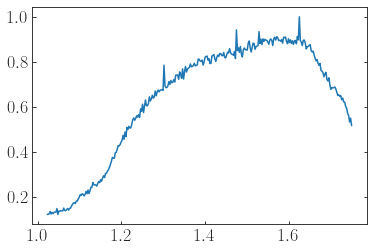

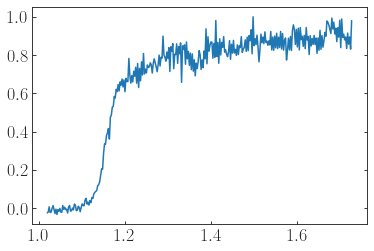

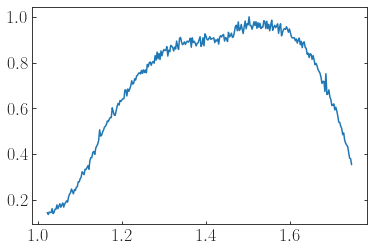

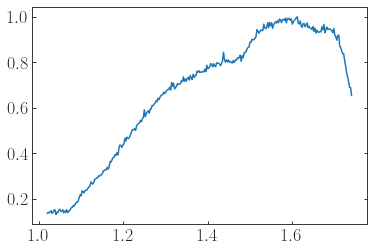

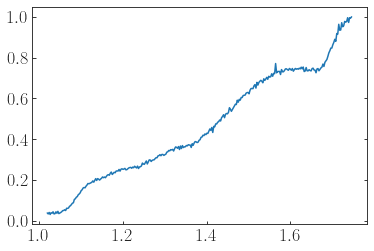

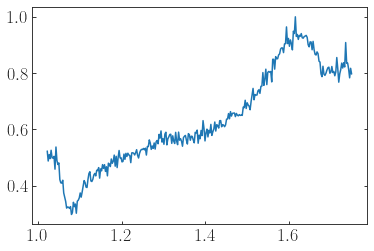

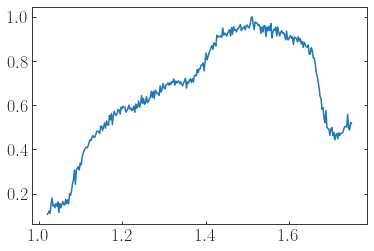

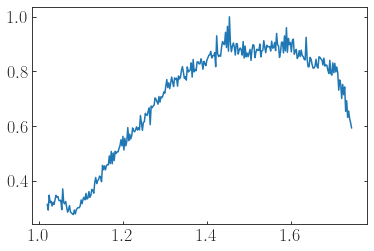

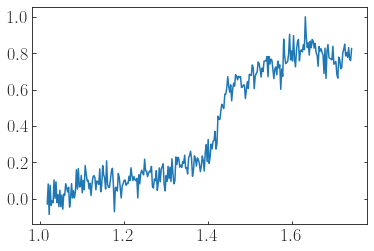

In [89]:
p=df[labels==1].apply(plot, axis=1)

In [90]:
#n=df[df.spt>35].apply(plot, axis=1)